# Kích thước dữ liệu nhỏ

## t-statistics
Áp dụng khi kích thước mẫu n < 30, ngược lại ta dùng z-score. Khi kích thước mẫu càng lớn thì t-score xấp xỉ z-score.
- z-test: so sánh mẫu thu thập với quần thể (sample vs population)
- t-test: so sánh 2 mẫu thu thập độc lập (sample_1 vs sample_2, curve_1 vs curve_2)

In [1]:
# import libraries
from scipy import stats
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print "t-test cho từng n"
print "n = 3:", stats.t.ppf(0.975, 2)
print "n = 10:", stats.t.ppf(0.975, 9)
print "n = 10:", stats.t.ppf(0.975, 19)
print "\nn = 100:", stats.t.ppf(0.975, 99)
print "z-score:", stats.norm.ppf(0.975)

t-test cho từng n
n = 3: 4.30265272991
n = 10: 2.26215716274
n = 10: 2.09302405441

n = 100: 1.98421695151
z-score: 1.95996398454


**Bài toán: tính khoảng tin cậy cho điểm số học sinh**
$$SE_{\bar{X}} = \frac{s}{\sqrt{n}} \ (SE: standard \ error)$$
$$UCL = \bar{x} + tScore * SE_{\bar{X}}$$
$$LCL = \bar{x} - tScore * SE_{\bar{X}}$$

In [3]:
# điểm của 10 học sinh
scores = np.asarray([120, 105, 100, 130, 115, 100, 185, 105, 130, 170])

# chuẩn bị các thông số
n = scores.size
degree_of_fredom = n - 1
confidence_interval = 0.98

sample_mean = scores.mean()
t_score = stats.t.ppf(confidence_interval, degree_of_fredom)
standard_err = scores.std() / math.sqrt(n) 

print "sample mean:", sample_mean
print "t-score:", t_score
print "standard error:", standard_err

# tính khoảng tin cậy
ucl = sample_mean + t_score * standard_err
lcl = sample_mean - t_score * standard_err

print "Tin cậy trên:", ucl
print "Tin cậy dưới:", lcl

sample mean: 126.0
t-score: 2.39844098471
standard error: 8.85437744847
Tin cậy trên: 147.236701767
Tin cậy dưới: 104.763298233


# So sánh hai quần thể
**Case study**
- Sử dụng **aspirin** có giảm tình trạng đau tim hay không?
- **Nam giới** khi lái xe thường gây ra tai nạn nhiều hơn **nữ giới** phải không?
- Tình trạng an ninh ở **Hồ Chí Minh** có tốt hơn ở **Hà Nội**?
- **Nam giới** thường có mức lương cao hơn **nữ giới** đúng không?
- **Ăn kiêng** và không tập luyện hay **tập luyện 2h/ngày** nhưng được ăn đủ thứ thì cái nào giúp giảm béo tốt hơn?
- Sử dụng **multi-vitamin** có giúp học sinh tiếp thu môn toán tốt hơn không?
- Học **online** hay học qua **sách giáo khoa** cái nào tốt hơn?

**Steps**
1. Chia quần thể thành experiment và control group
2. Chuẩn bị các thông số
    - Tính standard error
    - Tính khoảng tin cậy
3. Thực hiện kiểm định giả thuyết


## Theo tỉ lệ
$$SE = \sqrt{\frac{\hat{p}_1(1 - \hat{p_1})}{n_1} + \frac{\hat{p}_2(1 - \hat{p_2})}{n_2}}$$
$$UCL = (\hat{p}_1 - \hat{p}_1) + (Zscore * SE)$$
$$LCL = (\hat{p}_1 - \hat{p}_1) - (Zscore * SE)$$

**Sử dụng aspirin có giảm tình trạng đau tim hay không?**

In [4]:
# 1. Chia quần thể thành experiment và control group
group_aspirin = 2219
group_control = 2035
aspirin_heart_attacks = 26
control_heart_attacks = 46

In [5]:
# 2. Chuẩn bị các thông số
p_aspirin = aspirin_heart_attacks * 1.0 / group_aspirin
p_control = control_heart_attacks * 1.0 / group_control
print "Tỉ lệ phần trăm bị đau tim khi sử dụng aspirin:", p_aspirin * 100
print "Tỉ lệ phần trăm bị đau tim khi không sử dụng aspirin:", p_control * 100

# tính standard error
SE = math.sqrt(abs(p_aspirin * (1 - p_aspirin) / group_aspirin + p_control * (1 - p_control) / group_control))
print "Standard error giữa hai nhóm lấy mẫu:", SE

# tính khoảng tin cậy
diff_from_samples = abs(p_aspirin - p_control)
critical_value = stats.norm.ppf(0.975)
ucl = diff_from_samples + critical_value * SE
lcl = diff_from_samples - critical_value * SE
print "Differences from samples:", diff_from_samples
print "UCL:", ucl
print "LCL:", lcl

Tỉ lệ phần trăm bị đau tim khi sử dụng aspirin: 1.1716989635
Tỉ lệ phần trăm bị đau tim khi không sử dụng aspirin: 2.26044226044
Standard error giữa hai nhóm lấy mẫu: 0.00400938535831
Differences from samples: 0.0108874329695
UCL: 0.0187456838719
LCL: 0.00302918206703


In [6]:
# 3. Thực hiện kiểm định giả thuyết
# H0: cho rằng tỉ lệ mắc bệnh tim không thay đỗi. Nghĩa là p1 - p0 = 0
# H1: cho rằng tỉ lệ mắc bệnh tim sẽ giảm. Nghĩa là p1 - p0 != 0
# Chọn significant level (alpha, mức ý nghĩa) = 5%
# Ở đây là population nên ta sẽ chọn Z-statistic để test

$$z = \frac{(\hat{p}_1 - \hat{p}_2) - (p_1 - p_2)}{SE} = \frac{\hat{p}_1 - \hat{p}_2}{SE} \ (assuming \ no \ differences: p_1 = p_2)$$

In [7]:
z = diff_from_samples / SE
print "Z-score:", z
print "Critical value:", critical_value

if z > critical_value:
    print "Reject H0 => Sử dụng aspirin làm giảm nguy cơ bị đau tim"
else:
    print "Reject Ha => Sử dụng aspirin không làm giảm nguy cơ bị đau tim"

Z-score: 2.71548678824
Critical value: 1.95996398454
Reject H0 => Sử dụng aspirin làm giảm nguy cơ bị đau tim


## Theo mean
$$SE = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$$
$$UCL = (\hat{\mu}_1 - \hat{\mu}_1) + (Zscore * SE)$$
$$LCL = (\hat{\mu}_1 - \hat{\mu}_1) - (Zscore * SE)$$

### Mô phỏng quá trình lấy mẫu ngẫu nhiên
Học **online** hay học qua **sách giáo khoa** cái nào tốt hơn?
- Chọn ngẫu nhiên 100 học sinh để học online
- Chọn ngẫu nhiên 100 học sinh để học qua sách giáo khoa
- Cho 2 nhóm này học cùng một kiến thức toán nhưng từ hai nguồn khác nhau (online, sách giáo khoa)
- Làm bài kiểm tra toán trắc nghiệm để đánh giá 2 nhóm này.

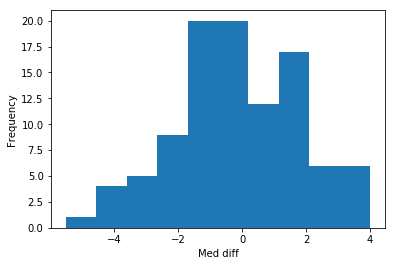

In [8]:
# Kết quả làm kiểm tra toán từ 2 nhóm
# A: học online
# B: học sách giáo khoa
# 30 câu trắc nghiệm, mỗi câu 1 điểm

def do_the_test():
    n = 100
    
    # cho từng nhóm làm kiểm tra
    group_A_scores = np.asarray([np.random.randint(1, 30) for p in range(0, n)])
    group_B_scores = np.asarray([np.random.randint(1, 30) for p in range(0, n)])

    # tính số điểm median của hai nhóm
    group_A_median_scores = np.median(group_A_scores)
    group_B_median_scores = np.median(group_B_scores)
    
    # so sánh sự khác biệt điểm số
    diff_AB = group_A_median_scores - group_B_median_scores
    return diff_AB

# Thực hiện kiểm tra nhiều lần
median_diffs = []
for i in range(0, 100):
    median_diffs.append(do_the_test())

# biểu diễn bằng histogram    
plt.hist(median_diffs)
plt.xlabel("Med diff")
plt.ylabel("Frequency")
plt.show()

In [9]:
# 1. Chia quần thể thành digital và text group
n_digital_group = 120
n_text_group = 80

digital_mean = 16.2
text_mean = 14.1

digital_std = 2.5
text_std = 3.6

diff_of_mean = digital_mean - text_mean
print "Difference mean scores:", diff_of_mean

Difference mean scores: 2.1


In [10]:
# 2. Chuẩn bị các thông số

# tính standard error
SE = math.sqrt(digital_std**2 / n_digital_group + text_std**2 / n_text_group)
print "Standard error giữa hai nhóm lấy mẫu:", SE

# tính khoảng tin cậy
critical_value = stats.norm.ppf(0.975)
ucl = diff_of_mean + critical_value * SE
lcl = diff_of_mean - critical_value * SE
print "UCL:", ucl
print "LCL:", lcl

Standard error giữa hai nhóm lấy mẫu: 0.462691401836
UCL: 3.00685848356
LCL: 1.19314151644


In [11]:
# 3. Thực hiện kiểm định giả thuyết
# H0: cho rằng học online không có gì khác học sách giáo khoa. Nghĩa là mean1 - mean2 = 0
# H1: cho rằng học online tốt hơn học sách giáo khoa. Nghĩa là mean1 - mean2 > 0
# Chọn significant level (alpha, mức ý nghĩa) = 1%
# Ở đây là population nên ta sẽ chọn Z-statistic để test

$$z = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{SE} = \frac{\bar{x_1} - \bar{x_2}}{SE} \ (assuming \ no \ differences: \mu_1 = \mu_2)$$

In [12]:
z = diff_of_mean / SE
print "Z-score:", z

critical_value = stats.norm.ppf(0.99)
print "Critical value:", critical_value

if z > critical_value:
    print "Reject H0 => học online tốt hơn học sách giáo khoa"
else:
    print "Reject Ha => học online không có gì khác học sách giáo khoa"

Z-score: 4.53866225235
Critical value: 2.32634787404
Reject H0 => học online tốt hơn học sách giáo khoa


# Chi-square
Còn gọi là goodness-of-fit test: dùng để test các thống kê có phân hoạch theo chu kỳ hay nhóm
$$X^2 = \sum \frac{(observed - expected)^2}{expected}$$
**Bài toán: báo cáo lượt view trong tuần từ phía Facebook có khác Google không?**
- H0: hai báo cáo là như nhau
- Ha: hai báo cáo là khác nhau

In [13]:
# số lượt view trong tuần phía Facebook
facebook_page_view_report = np.asarray([30, 50, 60, 60])

# số lượt view trong tuần phía Google
google_page_view_report = np.asarray([45, 48, 55, 52])

# calculate Chi-square
diff_observed = (google_page_view_report - facebook_page_view_report)**2
facebook_inverse = 1.0 / facebook_page_view_report
X2 = np.inner(diff_observed, facebook_inverse)
print "Chi-square:", X2

Chi-square: 9.06333333333


In [14]:
# compare with critical value
k = facebook_page_view_report.size
dof = k - 1
critical_value = stats.chi2.ppf(0.95, dof)
print "Critical value:", critical_value

if X2 > critical_value:
    print "Reject H0 => hai báo cáo là khác nhau"
else:
    print "Reject Ha => hai báo cáo là như nhau"

Critical value: 7.81472790325
Reject H0 => hai báo cáo là khác nhau


# ANOVA
Giả định của ANOVA
- Normal distribution
- Independent observations
- Equivalent variance

SST: Total sum of squares
$$SST = \sum_{i=1}^n (y_i - \bar{y})^2$$

SSW: Sum of squares within
$$SSW = \sum_{i=1}^k \sum_{j=1}^{n_i} (x_{ij} - \bar{x}_i)^2$$

SSB: Sum of squares between
$$SSB = n \sum_{i=1}^k \sum_{j=1}^n (\bar{x}_i - \bar{x})^2$$

f-statistics
$$SST = SSW + SSB$$
$$F-stat = \frac{\frac{SSB}{m - 1}}{\frac{SSW}{n_t - m}}$$

**Đánh giá các bộ phim có giống nhau?**
- H0: đánh giá các bộ phim là như nhau
- Ha: đánh giá các bộ phim là khác nhau

In [15]:
film_A = np.asarray([5, 3, 5, 3])
film_B = np.asarray([8, 3, 4, 5])
film_C = np.asarray([5, 6, 5, 8])
film_D = np.asarray([4, 6, 8, 2])

# SST: Total sum of squares
mean_A = film_A.mean()
mean_B = film_B.mean()
mean_C = film_C.mean()
mean_D = film_D.mean()

mean_collect = np.asarray([mean_A, mean_B, mean_C, mean_D])
grand_mean = mean_collect.mean()
print "Grand mean:", grand_mean

ss_A = np.inner(film_A - grand_mean, film_A - grand_mean)
ss_B = np.inner(film_B - grand_mean, film_B - grand_mean)
ss_C = np.inner(film_C - grand_mean, film_C - grand_mean)
ss_D = np.inner(film_D - grand_mean, film_D - grand_mean)
SST = ss_A + ss_B + ss_C + ss_D
print "Total sum of squares:", SST

Grand mean: 5.0
Total sum of squares: 52.0


In [16]:
# SSW: Sum of squares within
sw_A = np.inner(film_A - mean_A, film_A - mean_A)
sw_B = np.inner(film_B - mean_B, film_B - mean_B)
sw_C = np.inner(film_C - mean_C, film_C - mean_C)
sw_D = np.inner(film_D - mean_D, film_D - mean_D)
SSW = sw_A + sw_B + sw_C + sw_D
print "Sum of squares within:", SSW

Sum of squares within: 44.0


In [17]:
# SSB: Sum of squares between
n = film_A.size
SSB = n * np.inner(mean_collect - grand_mean, mean_collect - grand_mean)
print "Sum of squares between:", SSB

Sum of squares between: 8.0


In [18]:
n = film_A.size + film_B.size + film_C.size + film_D.size
m = mean_collect.size
f_stat = (SSB / (m - 1)) / (SSW / (n - m))
print "F statistics:", f_stat

# get critical value
dfn = m - 1
dfd = n - m
critical_value = stats.f.ppf(0.95, dfn, dfd)
print "Critical value:", critical_value

if f_stat > critical_value:
    print "Reject H0 => đánh giá các bộ phim là khác nhau"
else:
    print "Reject Ha => đánh giá các bộ phim là như nhau"

F statistics: 0.727272727273
Critical value: 3.4902948195
Reject Ha => đánh giá các bộ phim là như nhau


# Pair plot

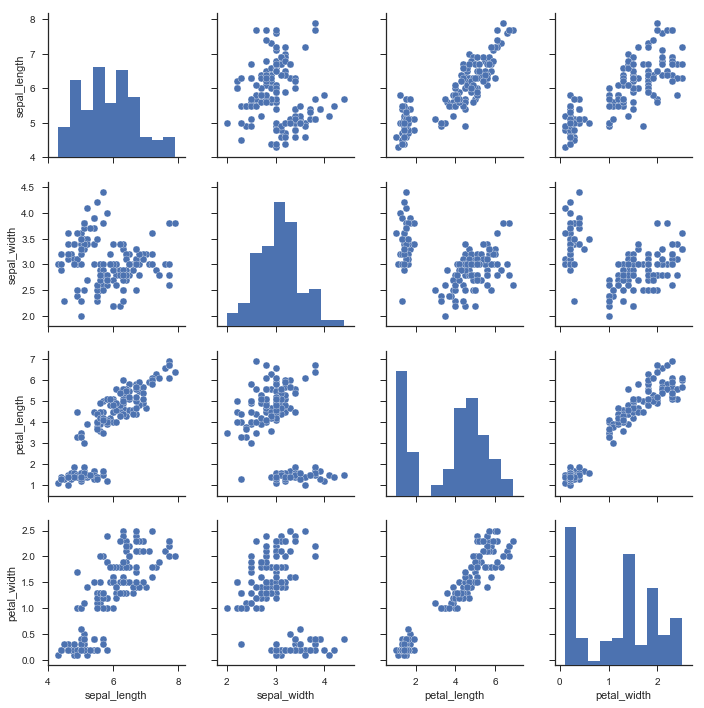

In [19]:
%matplotlib inline
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)